In [1]:
%run poisson_processes.ipynb
import numpy as np
import pickle
import os

In [2]:
# Load the data
data_dir = 'data'

In [3]:
with open(os.path.join(data_dir, 'data_dict.pkl'), 'rb') as f:
    data_dict = pickle.load(f)

In [4]:
# Access the data for the first replicate
processes = data_dict[0]['processes']
correlated_processes = data_dict[0]['correlated_processes']
counting_process_nd_result = data_dict[0]['counting_process_nd_result']

In [5]:
with open(os.path.join(data_dir, 'processes.pkl'), 'rb') as f:
    processes = pickle.load(f)

In [6]:
with open(os.path.join(data_dir, 'correlated_processes.pkl'), 'rb') as f:
    correlated_processes = pickle.load(f)

In [7]:
with open(os.path.join(data_dir, 'network_spike_times.pkl'), 'rb') as f:
    network_spike_times = pickle.load(f)

In [8]:
with open(os.path.join(data_dir, 'counting_process_nd_result.pkl'), 'rb') as f:
    counting_process_nd_result = pickle.load(f)

In [9]:
# check if there is a serializer in brian2 (to save results from time to time)
# they exist in python, called serializers, could save a copy and that copy becomes a data structure (json file)
# For each replicate, obtain the spike monitor (the thing to watch out for) and save it. Only necessary for larger systems.
# Clean up code more modularly, what do I need, what can I throw out. 
# Save the whole spike monitor or just the ouptput I need (probably just do the output I need for low run time).
# store all the outputs elsewhere, just use the ones I absolutely need in this code.
# make sure the function works with spike monitor, then do two, observe the data structure (use dictionary with key replicate number)
# use the data structure to eval count fncs, use those count fncs to do statistics (mean).
# stats, we are looking for means and covaraiance, prepare to present data in this format (dimensions on columns, replicates on rows)
# figure out what covariance does, prepare a list of vectors, have a 
# np.cov and np.mean
# when collecting the vector activities, put them into an array

In [10]:
num_neurons = 3
rate = 10
time = 1000
num_common = 2
num_samples = 10 #later set this to 10, then 100. 1 lets there be one replicate

WARNING    C:\Users\agreg\anaconda3\envs\brian_tutorial\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
 [py.warnings]


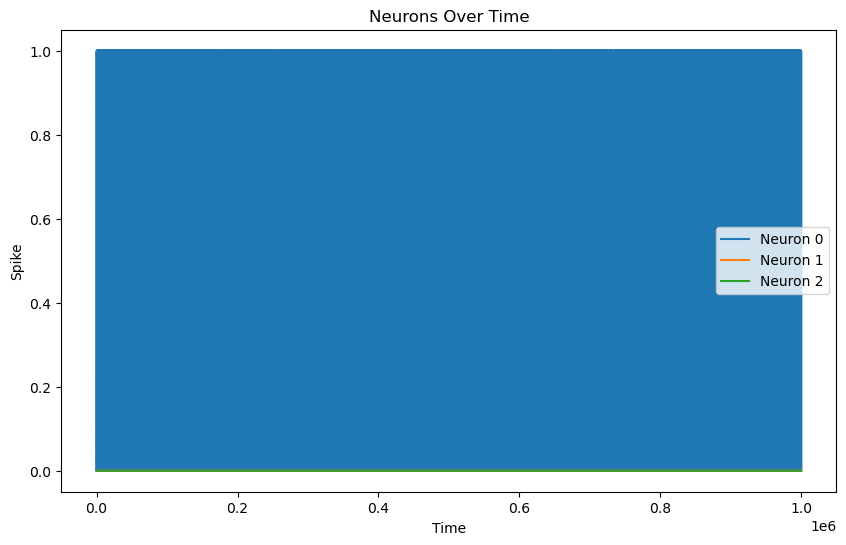

In [11]:
plot_neurons_spiking(processes, time)

Mean: 0.01
Standard Deviation: 0.10


ValueError: 'x' has size 1000, but 'y1' has an unequal size of 1000000

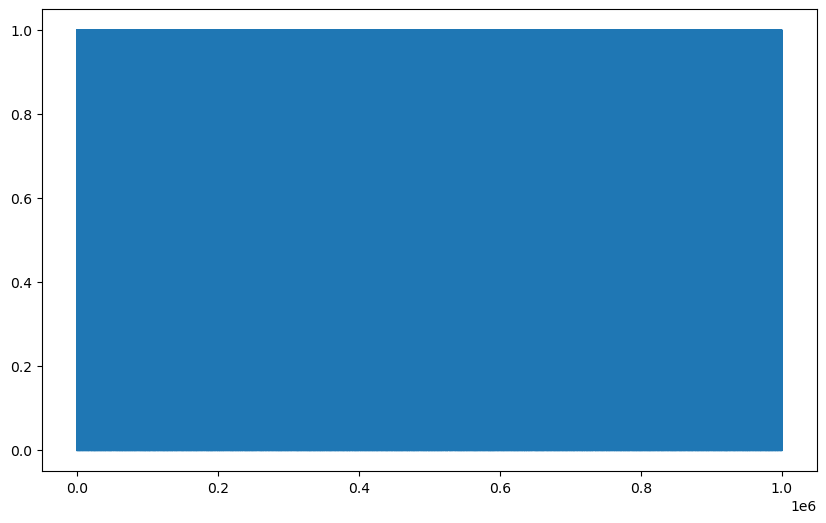

In [12]:
plot_neuron_spiking_standard_dev(processes, time)

IndexError: list index out of range

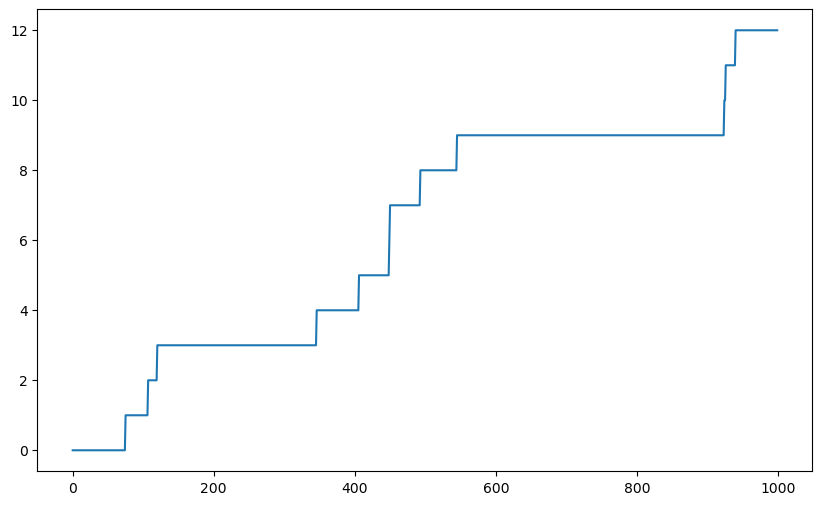

In [41]:
plot_count_neuron1_vs_time(counting_process_nd_result, num_samples)

IndexError: list index out of range

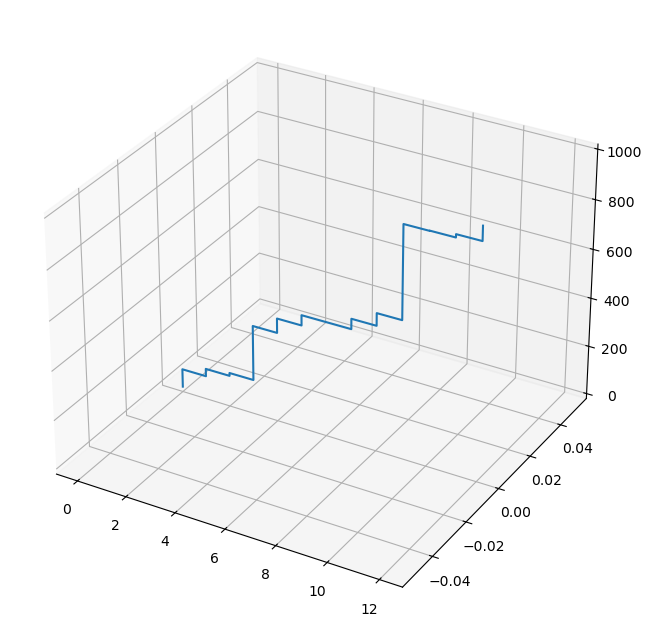

In [43]:
plot_count_neuron1_vs_neuron2_vs_time(counting_process_nd_result, num_samples)

In [ ]:
plot_count1(count1_result)

In [ ]:
plot_counts(countall_result)

In [ ]:
plot_counts_vectorized(countall_vectorized_result)

In [ ]:
print("Independent Poisson processes:")
for i in range(num_neurons):
    print("Neuron {}: mean = {}, variance = {}".format(i, sum(processes[0][i]) / len(processes[0][i]), sum([x**2 for x in processes[0][i]]) / len(processes[0][i]) - (sum(processes[0][i]) / len(processes[0][i]))**2))

In [ ]:
print("\nCorrelated Poisson processes:")
for i in range(num_neurons):
    print("Neuron {}: mean = {}, variance = {}".format(i, sum(correlated_processes[0][i]) / len(correlated_processes[0][i]), sum([x**2 for x in correlated_processes[0][i]]) / len(correlated_processes[0][i]) - (sum(correlated_processes[0][i]) / len(correlated_processes[0][i]))**2))

In [ ]:
print("\nNetwork spike times:")
for i in range(num_neurons):
    print("Neuron {}: spike times = {}".format(i, network_spike_times.get(i, [])))

In [ ]:
mean_with_std = calculate_mean_with_std(processes)
print("Mean with standard deviation: ", mean_with_std)

In [ ]:
cov_matrix = calculate_covariance_matrix(processes)
print("Covariance matrix: ", cov_matrix)

In [ ]:
discretized_independent_processes = discretize_time(processes[0], time)
discretized_correlated_processes = discretize_time(correlated_processes[0], time)

In [ ]:
print("Discretized independent processes:")
print(discretized_independent_processes[:10])

In [ ]:
print("\nDiscretized correlated processes:")
print(discretized_correlated_processes[:10])

In [ ]:
sampled_independent_processes = sample_spikes(processes[0], time)
sampled_correlated_processes = sample_spikes(correlated_processes[0], time)

In [ ]:
print("\nSampled independent processes:")
print(sampled_independent_processes[:10])

In [ ]:
print("\nSampled correlated processes:")
print(sampled_correlated_processes[:10])

In [ ]:
tagged_independent_processes = tag_events_with_poisson(processes[0][0], rate)
tagged_correlated_processes = tag_events_with_poisson(correlated_processes[0][0], rate)

In [ ]:
print("\nTagged independent processes:")
print(tagged_independent_processes[:10])

In [ ]:
print("\nTagged correlated processes:")
print(tagged_correlated_processes[:10])

In [ ]:
brand_spike_times = brand_networks(num_neurons, rate, time)
brand_spike_times_multiple_rates = brand_networks(num_neurons, rate, time, num_rates=3)

In [ ]:
print("\nBrand spike times:")
for key, value in list(brand_spike_times.items())[:10]:
    print(f"Neuron {key}: {value}")

In [ ]:
print("\nBrand spike times multiple rates:")
for key, value in list(brand_spike_times_multiple_rates.items())[:10]:
    print(f"Neuron {key}: {value}")

In [ ]:
count_at_time_result = count_at_time(processes[0][0], np.arange(time), time)
print("\nCount at time:", count_at_time_result)

In [ ]:
count1_result = count1(processes[0][0], time)
print("\nCount1:", count1_result)

In [ ]:
countall_result = countall(processes[0], time)
print("\nCountall:", countall_result)

In [ ]:
countall_vectorized_result = countall_vectorized(processes, time)
print("\nCountall vectorized:", countall_vectorized_result)